In [ ]:
# Este ejemplo se corre con las siguientes versiones
# pd.__version__
# 1.0.2
# sklearn.__version__
# 0.22.1
# matplotlib.__version__
# 3.1.3
# np.__version__
# 1.18.1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 

In [2]:
data = pd.read_csv('ts.csv')
data.head()

,tiempo,magnitud
0,0.000000,-5.298
1,0.009595,-5.907
2,0.019340,-5.387
3,0.980787,-5.185
4,0.990278,-5.184


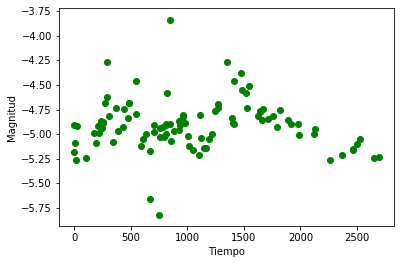

In [3]:
data_muestra = data.sample(100)
plt.scatter(data_muestra['tiempo'],data_muestra['magnitud'], color='green')
plt.ylabel('Magnitud')
plt.xlabel('Tiempo')
plt.show()

In [4]:
RegLineal = LinearRegression()
RegLineal.fit(data[['tiempo']], data['magnitud'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
print(RegLineal.intercept_)
print(RegLineal.coef_)

-4.903673361574064
[-2.41096697e-05]


In [ ]:
# reshape(-1,1) tranforma vector de shape (n,) a (n,1). Es decir, desde vector fila a vector columna

In [6]:
x_lin = np.linspace(min(data['tiempo']),max(data['tiempo'])).reshape(-1,1)
y_pred = RegLineal.predict(x_lin)

In [7]:
np.linspace(min(data['tiempo']),max(data['tiempo'])).shape

(50,)

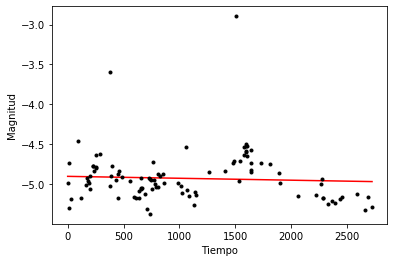

In [8]:
data = data.sample(100)
plt.plot(x_lin,y_pred, color='red')
plt.plot(data['tiempo'],data['magnitud'],'.', color='black')
plt.ylabel('Magnitud')
plt.xlabel('Tiempo')
plt.show()

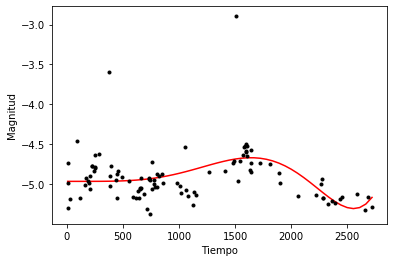

In [11]:
polinomio = PolynomialFeatures(degree = 8) 
model = LinearRegression() 

x = data['tiempo'].values.reshape(-1,1)
data_poly = polinomio.fit_transform(x) 

model.fit(data_poly, data['magnitud']) 

x_lin = np.linspace(min(data['tiempo']),max(data['tiempo'])).reshape(-1,1)
data_poly_plot = polinomio.fit_transform(x_lin)
y_pred = model.predict(data_poly_plot)

plt.plot(x_lin,y_pred, color='red')
plt.plot(data['tiempo'], data['magnitud'],'.', color='black')
plt.ylabel('Magnitud')
plt.xlabel('Tiempo')
plt.show()

In [15]:
data_poly.shape

(100, 9)